# Part I - (Dataset Exploration fordgobike-tripdata)
## by (Adefowoke Sule)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#Univariate" >Univariate Exploration</a></li>
<li><a href="#Bivariate" >Bivariate Exploration</a></li>
<li><a href="#Multivariate" >Multivariate Exploration</a></li>
<li><a href="#Multivariate" >Multivariate Exploration</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
### Dataset Description 
   This dataset was provided by ford gobike service, it consists of trips taken by members of the service for month of February of 2019.

1. duration_sec :time spent in seconds
2. start_time : when the ride started
3. end_time : when ride ended
4. start_station_id : unique identifier for the station in which the ride started
5. start_station_name: name of the station where the ride started
6. start_station_latitude : latitude of the start station
7. start_station_longitude: longitude of the start station
8. end_station_id : unique identifier for the station in which the ride ended
9. end_station_name : name of the station where the ride ended
10. end_station_latitude : latitude of the end station
11. end_station_longitude : longitude of the end station
12. bike_id :  unique identifier of the bike used
13. user_type : either Customer or Subscriber
14. member_birth_year : birth year of the member
15. member_gender : Male, Female, Other 
16. bike_share_for_all_trip :  Yes or No



## Preliminary Wrangling


In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 296kB 15.1MB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01 0% |                                | 40kB 20.0MB/s eta 0:00:01    10% |███▍                            | 1.4MB 30.6MB/s eta 0:00:01    15% |█████                           | 2.1MB 13.2MB/s eta 0:00:01    35% |███████████▌                    | 4.8MB 20.6MB/s eta 0:00:01    45% |██████████████▊                 | 6.2MB 13.6MB/s eta 0:00:01    51% |████████████████▎               | 6.8MB 29.1MB/s eta 0:00:01    66% |█████████████████████▍          | 8.9MB 27.6MB/s eta 0:00:01    77% |█████████████████████████       | 10.4MB 13.6MB/s eta 0:00:01    83% |██████████████████████████▋     | 11.1MB 13.6MB/s eta 0:00:01    97% |███████████████████████████████ | 13.0MB 27.6MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 1.7MB/s eta 0:00:01  2% |█                               | 337kB 27.0MB/s eta 0:00:01    13% |████▍                     

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#pd.options.mode.chained_assignment = None



%matplotlib inline
sns.set(style="darkgrid")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

Matplotlib is building the font cache; this may take a moment.


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df_bike = pd.read_csv('./201902-fordgobike-tripdata.csv')

### Assessing df_bike dataset for quality and tidiness issues using both visual and programmatic methods

In [20]:
# high-level overview of data shape and composition
print(df_bike.info())
df_bike

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [21]:
df_bike.shape

(183412, 16)

In [22]:
df_bike.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [23]:
df_bike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
10537,359,2019-02-27 20:14:50.9860,2019-02-27 20:20:50.6510,66.0,3rd St at Townsend St,37.778742,-122.392741,104.0,4th St at 16th St,37.767045,-122.390833,4902,Subscriber,1992.0,Male,No
141479,643,2019-02-07 17:54:56.3700,2019-02-07 18:05:39.7760,148.0,Horton St at 40th St,37.829705,-122.287610,176.0,MacArthur BART Station,37.828410,-122.266315,5241,Subscriber,NaN,NaN,No
93109,165,2019-02-15 18:06:14.4900,2019-02-15 18:08:59.8250,75.0,Market St at Franklin St,37.773793,-122.421239,86.0,Market St at Dolores St,37.769305,-122.426826,5550,Subscriber,1987.0,Male,No
122110,450,2019-02-11 12:53:15.7540,2019-02-11 13:00:46.7350,49.0,S Park St at 3rd St,37.780760,-122.394989,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2206,Customer,NaN,NaN,No
169657,527,2019-02-04 09:31:35.1270,2019-02-04 09:40:22.2770,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,5085,Subscriber,1997.0,Male,No


In [35]:
type(df_bike.start_time[0])

str

In [36]:
sum(df_bike.duplicated())  # no duplicated entry

0

In [24]:
df_bike.isna().sum()  # amount of missing values

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [31]:
df_bike.query('start_station_id != start_station_id') # query to get start_station_id with NaN

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


From the above query, it seems the NaN values for the start_station_id ,start_station_name,end_station_id , end_station_name  are in the same index values

In [25]:
#The amount of unique values in each feature

print('The number of unique values for each feature is:')
for var in df_bike:
    print(var ,':',df_bike[var].nunique())

The number of unique values for each feature is:
duration_sec : 4752
start_time : 183401
end_time : 183397
start_station_id : 329
start_station_name : 329
start_station_latitude : 334
start_station_longitude : 335
end_station_id : 329
end_station_name : 329
end_station_latitude : 335
end_station_longitude : 335
bike_id : 4646
user_type : 2
member_birth_year : 75
member_gender : 3
bike_share_for_all_trip : 2


From the aove analysis it shows the followig:
* The start_station and end_station are both the starting and ending points for more than one rider
* Some bikes were used more than once 
* Some members share same birth year
* Some members rode the bike for the same time duration
* Only few riders had the same start and end time

In [39]:
df_bike['member_birth_year'].unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

In [8]:
df_bike['member_birth_year'].describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

The age group of the members ranged from 141-18yrs, that is the year were subracted from 2019, which was the year the data was collected

In [40]:
df_bike['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [41]:
df_bike['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
df_bike['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [5]:
df_bike.query('member_gender == "Other"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
131,1187,2019-02-28 22:39:58.5600,2019-02-28 22:59:46.2060,262.0,West St at University Ave,37.869967,-122.286533,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,5649,Subscriber,1993.0,Other,No
135,544,2019-02-28 22:48:12.7300,2019-02-28 22:57:17.0800,356.0,Valencia St at Clinton Park,37.769188,-122.422285,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,6065,Subscriber,1991.0,Other,No
190,515,2019-02-28 22:28:11.3470,2019-02-28 22:36:46.3890,58.0,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,-122.403071,5234,Subscriber,1981.0,Other,No
231,244,2019-02-28 22:21:46.8260,2019-02-28 22:25:51.2500,75.0,Market St at Franklin St,37.773793,-122.421239,58.0,Market St at 10th St,37.776619,-122.417385,481,Subscriber,1981.0,Other,No
261,748,2019-02-28 22:03:01.7060,2019-02-28 22:15:30.3670,74.0,Laguna St at Hayes St,37.776435,-122.426244,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6520,Subscriber,1985.0,Other,No
710,485,2019-02-28 20:36:18.5170,2019-02-28 20:44:23.6630,181.0,Grand Ave at Webster St,37.811377,-122.265192,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,4579,Subscriber,1983.0,Other,No
798,975,2019-02-28 20:13:20.5050,2019-02-28 20:29:35.6690,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,6060,Subscriber,1982.0,Other,No
827,352,2019-02-28 20:19:41.5110,2019-02-28 20:25:34.1210,163.0,Lake Merritt BART Station,37.797320,-122.265320,200.0,2nd Ave at E 18th St,37.800214,-122.253810,3505,Subscriber,1984.0,Other,No


From the above query it seems the member_gender == 'Other' has more of 'No' for the bike_share_for_all_trip

In [6]:
df_bike.query('member_gender != member_gender') # query for member_gender  which are NaN

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


From the above query, it seems the NaN for member_gender is at the same index for member_birth_year

###### All member_birth_year with NaN also have the same number of NaN in member_gender

### Questions:
#### 1. what age group is predominat
#### 2. which sex is predominate
#### 3. which  day is mostly used
#### 4. which user type is more
#### 5. is there a predominant station
#### 6. is there a predominant time

### Quality issues

1. some of the features have the wrong data type
2. missing values
3. some of the values are nan

# Cleaning Data

In [4]:
df_copy = df_bike.copy() # make a copy of the data before performing any changes

### Issue #1: Values as NaN

### Define:

##### Drop rows with NaN in the following columns; start_station_id, start_station_name, end_station_id, end_station_name, member_gender, member_birth_year

### Code

In [5]:
df_copy = df_copy.dropna()

### Test

In [6]:
df_copy.isna().sum() # There are no more missing values

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [52]:
df_copy.shape

(174952, 16)

In [6]:
df_copy = df_copy.reset_index(drop=True)

### Issue #2 : station_ids

### Define :  change the ids of all station to integer

### Code :

In [7]:
df_copy[[ 'start_station_id', 'end_station_id']] = df_copy[[ 'start_station_id', 'end_station_id']].astype('int')

### Test

In [8]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### Issue #3 : some of the features have the wrong data type

### Define : Change the data type of features to apropriate dtype

### Code :

In [8]:
change_dtype = {'duration_sec' : float,
                'start_time' :'datetime64[ns]',
                'end_time' :'datetime64[ns]',
                 'start_station_id' : str,
                'end_station_id' : str,
                'bike_id' : str,
               'member_birth_year' : 'Int64'}

In [9]:
df_copy = df_copy.astype(change_dtype)

### Test

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null float64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usa

In [12]:
df_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,61854.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
2,36490.0,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No


*****

******

### Issue #4 : Days of the week

### Define : Extract the day of the week from the start_time and end_time and repalce it with the equivalent in words

### Code :

In [10]:
df_copy['start_dow'] = df_copy['start_time'].dt.dayofweek

In [11]:
df_copy['end_dow'] = df_copy['end_time'].dt.dayofweek

In [12]:
# replace the integer with corresponding name of the day of the week
df_copy['end_dow'].replace([0,1,2,3,4,5,6],
                    ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],
                    inplace=True)

In [13]:
df_copy['start_dow'].replace([0,1,2,3,4,5,6],
                    ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],
                    inplace=True)

### Test

In [75]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dow,end_dow
0,52185.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,thursday,friday
1,61854.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,thursday,friday


### Issue #5 : Day 

### Define : Extract the day from the start_time and end_time

### Code :

In [14]:
df_copy['start_day'] = df_copy['start_time'].dt.day.astype('int')

In [15]:
df_copy['end_day'] = df_copy['end_time'].dt.day.astype('int')

### Test

In [52]:
type(df_copy.end_day[0])

numpy.int64

In [79]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dow,end_dow,start_day,end_day
0,52185.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,No,thursday,friday,28,1
1,61854.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,No,thursday,friday,28,1


### Issue #6 :  duration_sec should be in minutes

### Define :  convert the duration_sec into minute by dividing each value by 60

### Code :

In [16]:
df_copy["duration_min"] = df_copy.duration_sec/60

### Test

In [102]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dow,end_dow,start_day,end_day,duration_min
0,52185.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,thursday,friday,28,1,869.75
1,61854.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,thursday,friday,28,1,1030.90


In [103]:
type(df_copy.duration_min[0])

numpy.float64

### Issue #7 : Get the age of each member

### Define : Since this data was collected in 2019, then each year from the member_birth_year will be subtracted from 2019

### Code :

In [17]:
df_copy['member_age'] = 2019 - df_copy['member_birth_year']

### Test

In [105]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dow,end_dow,start_day,end_day,duration_min,member_age
0,52185.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,thursday,friday,28,1,869.75,35
1,61854.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,thursday,friday,28,1,1030.90,47


### Issue #8 : Irrelevant columns

### Define : Drop unwanted columns ( lattitudes, longitudes, station names, duration_sec)

### Code :

In [18]:
df_copy.drop(columns = ['start_station_name','end_station_name', 'duration_sec','start_time','end_time',
                        'start_station_latitude','end_station_latitude','member_birth_year',
                        'start_station_longitude','end_station_longitude'],inplace=True)

### Test

In [21]:
df_copy.head(2)

,start_station_id,end_station_id,bike_id,user_type,member_gender,bike_share_for_all_trip,start_dow,end_dow,start_day,end_day,duration_min,member_age
0,21,13,4902,Customer,Male,No,thursday,friday,28,1,869.75,35
1,86,3,5905,Customer,Male,No,thursday,friday,28,1,1030.90,47


In [57]:
df_copy.shape

(174952, 12)

#### Summary Statistics of the quantitative featues

In [58]:
df_copy.describe()

,start_day,end_day,duration_min,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,15.312337,15.311714,11.733379,34.196865
std,8.033926,8.034127,27.370082,10.118731
min,1.000000,1.000000,1.016667,18.000000
25%,8.000000,8.000000,5.383333,27.000000
50%,15.000000,15.000000,8.500000,32.000000
75%,22.000000,22.000000,13.150000,39.000000
max,28.000000,28.000000,1409.133333,141.000000


###### From the table above, 
> member_birth_year: the median (1987) is greater than the mean(1984), meaning there is slight negative skweness,                      with the std (10) far from the mean, this means there is it widely dispersed.

> duration_min: the mean (11.73) is greater than the median (8.5), this shows positive skewness, with std (27.3)                     shows the data is widely dispersed

> member_age : the mean age (34) is slightly greater than the median age (32), there is slight positive                        skewness, with a wide dispersion
> Both the start_day and end_day have its maximum value as 28, this is because the dataset was in the month of feburary, 2019

### What is the structure of your dataset?

> df_copy contains 12 features with 174952 observations.The features are a combination of floats, integer, string, datetime and boolean

### What is/are the main feature(s) of interest in your dataset?

> the features of interest(s) is/are member_age, duration_min

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The remaining features would be used to explore further the features of interest and uncover insights


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [19]:
# function for the x,y label and title for plot
def label(x,y,t) :
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)


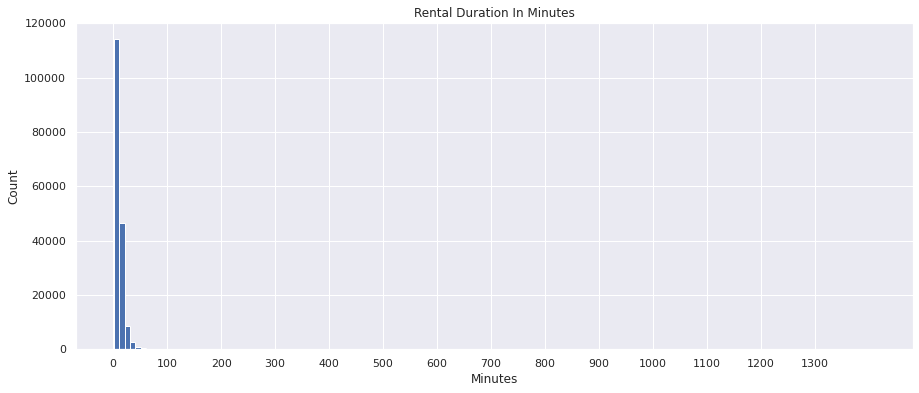

In [21]:
ticks = list(range(1400))
plt.figure(figsize=[15,6])

bins=np.arange(df_copy['duration_min'].min(),df_copy['duration_min'].max()+10,10)
plt.hist(data=df_copy,x='duration_min',bins=bins);

plt.xticks(ticks[::100])
label('Minutes','Count','Rental Duration In Minutes');

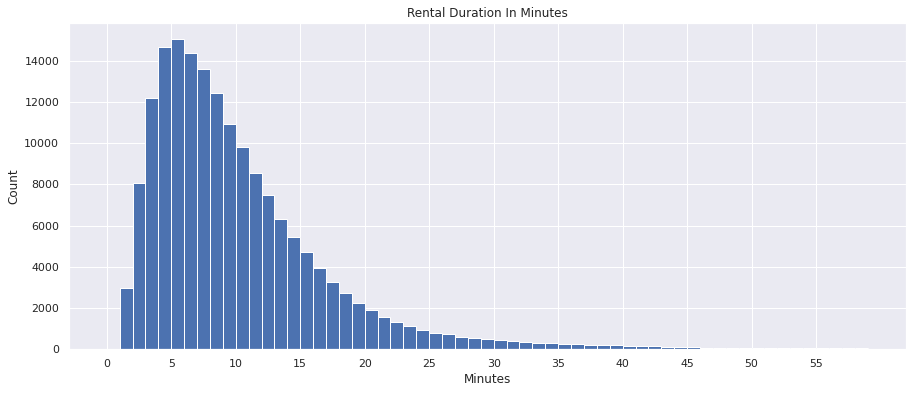

In [26]:
# I zoomed in into values <= 60 minutes

ticks = list(range(60))
plt.figure(figsize=[15,6])

bins=np.arange(0,60,1)
plt.hist(data=df_copy,x='duration_min',bins=bins);

plt.xticks(ticks[::5])
label('Minutes','Count','Rental Duration In Minutes');


##### From the above one can infer that most rides last for less than 10 minutes

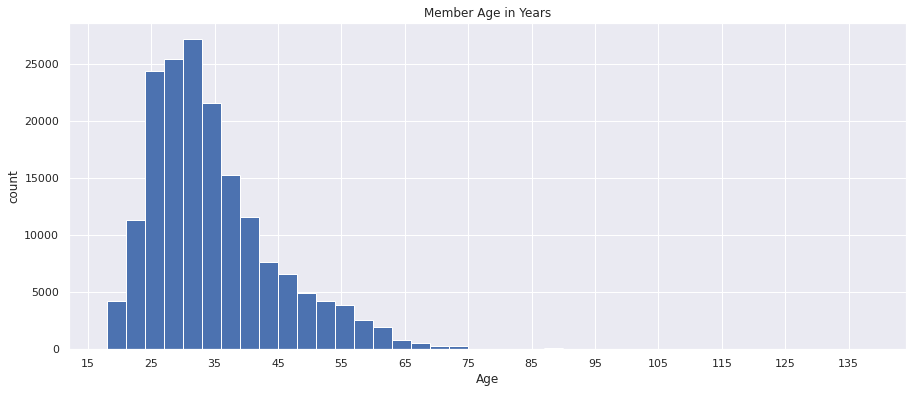

In [28]:
ticks = list(range(141))
plt.figure(figsize=[15,6])

bins=np.arange(df_copy['member_age'].min(),df_copy['member_age'].max(),3)
plt.hist(data=df_copy,x='member_age',bins=bins);


plt.xticks(ticks[15::10])
label('Age (yrs)','count','Member Age in Years');

##### From the above the most frequent age group is 30-32 years,

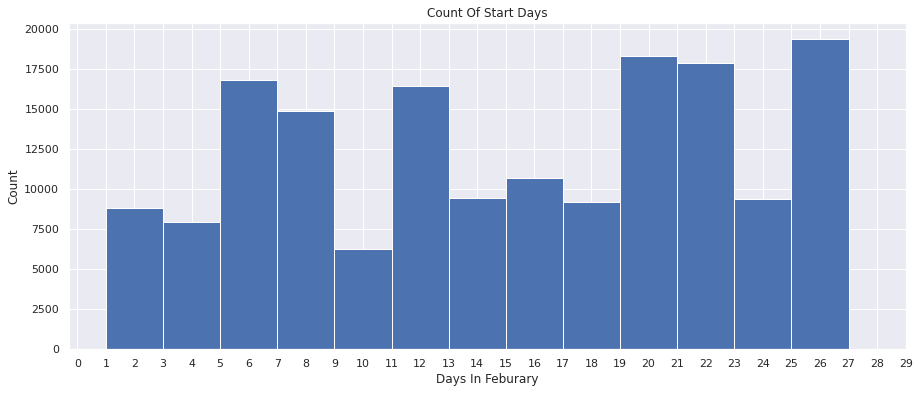

In [29]:
ticks = list(range(30))
plt.figure(figsize=[15,6])

bins=np.arange(1,28,2)
plt.hist(data=df_copy,x='start_day',bins=bins);
plt.xticks(ticks[::1])
label('Days In Feburary','Count','Count Of Start Days');

##### From the above it seems a larger amount of riders prefer their rides towards the end of the month

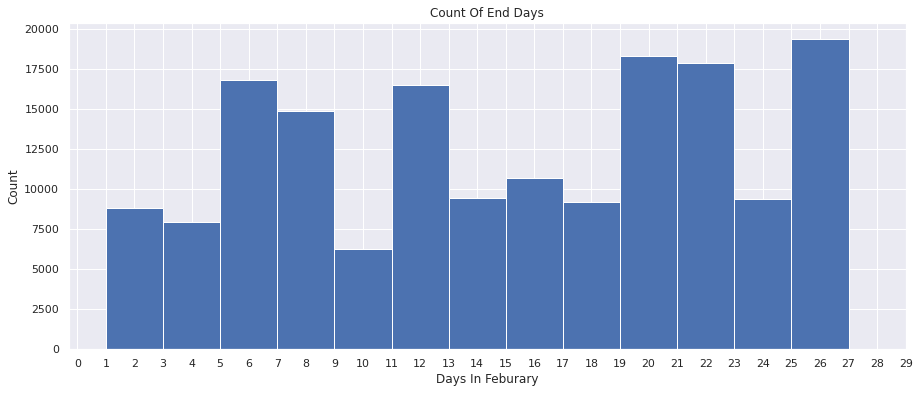

In [30]:
ticks = list(range(30))
plt.figure(figsize=[15,6])

bins=np.arange(1,28,2)
plt.hist(data=df_copy,x='end_day',bins=bins);

plt.xticks(ticks[::1])
label('Days In Feburary','Count','Count Of End Days');

##### From the above most rides ended towards the last 3 days of the month, which one can conclude this is most likely because most riders preferred starting their trip toward the last 3 days of the month

In [20]:
# function for count plot 

def count_plot(col):
    plt.rcParams["figure.figsize"] = 15,6
    value = df_copy[col].value_counts()
    color1 = sns.color_palette()[0]
    color2 = sns.color_palette()[7]
    clrs = [color2 if (x < max(value.values)) else color1 for x in value.values ]
    sns.countplot( data = df_copy , x = col ,palette=clrs)#, order=days)
    plt.xticks(rotation= 45)

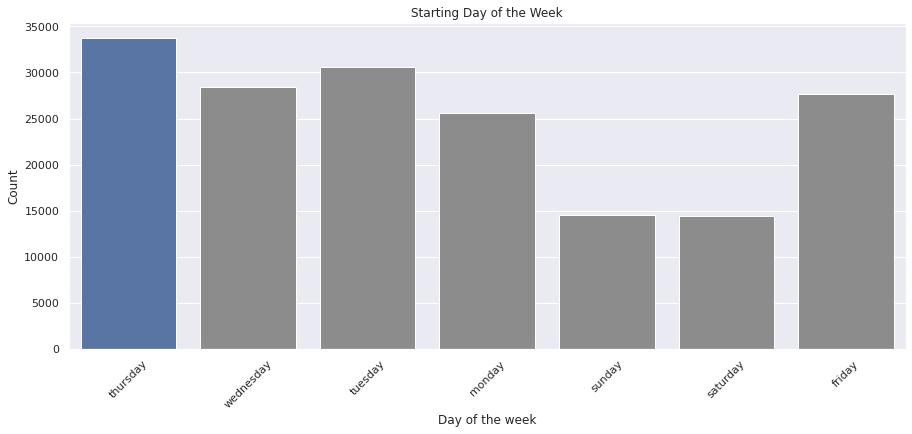

In [32]:
count_plot('start_dow')
label('Day of the week','Count','Starting Day of the Week');

##### From the above it seems most riders preferred Thursdays to start their rides

In [21]:
# function for a bar plot

def bar_plot(x):
    sns.set(font_scale=1.4)
    color = sns.color_palette()[0]
    df_copy[x].value_counts().nlargest(10).plot(kind='bar', figsize=(15, 6), rot=0, color=color)

In [36]:
df_copy['start_station_id'].value_counts().nlargest(10)

58    3649
67    3408
81    2952
21    2711
3     2620
30    2577
15    2541
22    2216
16    2191
5     2144
Name: start_station_id, dtype: int64

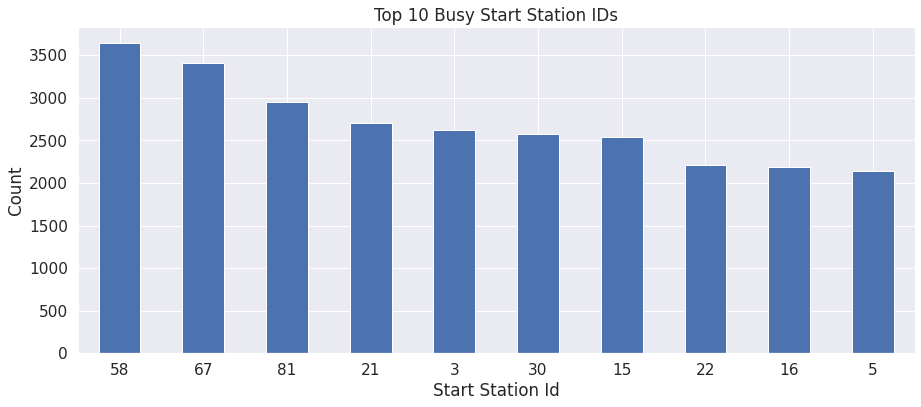

In [34]:
bar_plot('start_station_id')
label('Start Station Id', 'Count', 'Top 10 Busy Start Station IDs')

In [37]:
df_copy['end_station_id'].value_counts().nlargest(10)

67    4624
58    3709
21    3461
15    3151
30    2870
3     2854
81    2782
6     2341
16    2264
5     2153
Name: end_station_id, dtype: int64

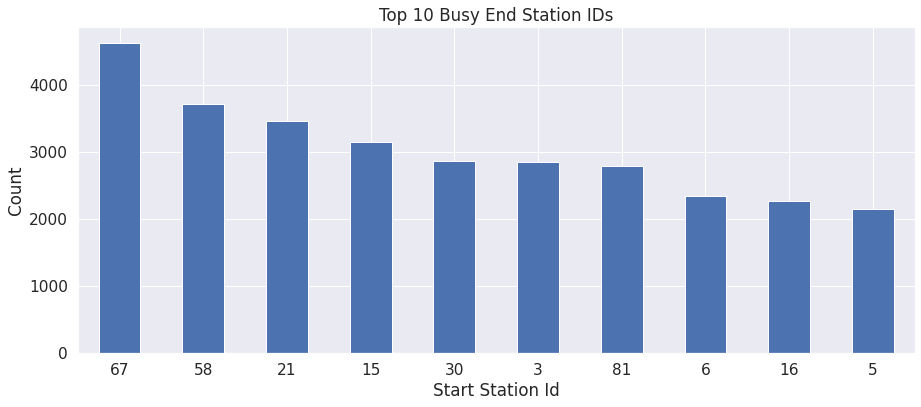

In [39]:
bar_plot('end_station_id')
label('End Station Id', 'Count', 'Top 10 Busy End Station IDs')

In [22]:
# Function for pie plot

def pie_chart(x,y):
    ax = df_copy[x].value_counts().plot(kind='pie', 
                                       figsize=(15,6), 
                                       autopct='%.0f%%',
                                        startangle = 90,
                                      shadow = False)
    ax.set_title(y);

In [63]:
df_copy['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

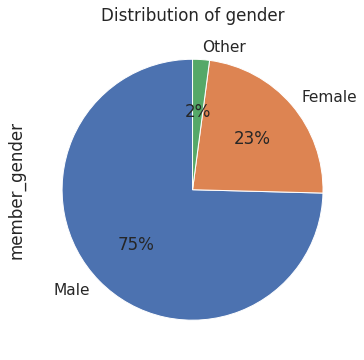

In [64]:
pie_chart('member_gender','Distribution of gender')

The largest percentage of the bike user are male (75%)

In [38]:
df_copy['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

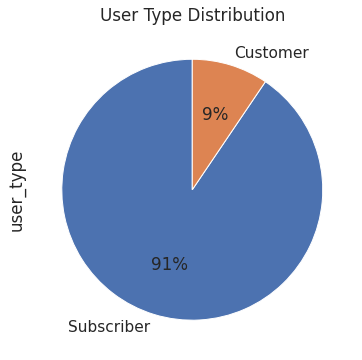

In [65]:
pie_chart('user_type','User Type Distribution')

##### About 91% of riders are subscribers while remaining 9% are customers

The largest percentage of users are the 'Subscriber'

In [85]:
df_copy['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

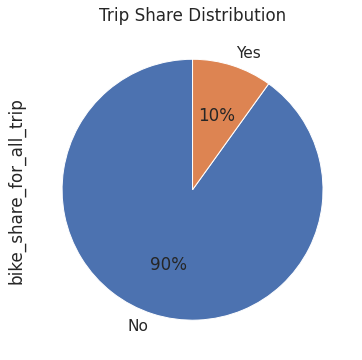

In [66]:
pie_chart('bike_share_for_all_trip','Trip Share Distribution')

##### About 90% of riders did not share their trip information

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The duration_sec was first converted to duration in minutes by dividing each observation by 60. When plotted it shows this feature had a slim curve with the last observable bar before 100 minutes, so i zoomed into duration <= 60 minutes. When plotted it shows a unimodal distribution with a right tail skewness. The peak occurred around 5-6 minutes, meaning most riders duration of ride was around 5-6 minutes.
> The member_age feature was gotten from subtracting member_birth_year from 2019 then change the dtype to integer. When plotted it showed a unimodal distribution , right tail skewness and a peak around 25-35 years.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The start_day and end_day features were derived by extrapolation from the start_time and end_time features, converted to integers. Both features showed a multimodal distribution with their peaks at day 5-7, 11-13,19-23, 25-27.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [23]:
numeric_vars = ['start_day', 'end_day', 'duration_min','member_age']
categoric_vars = ['user_type','member_gender','bike_share_for_all_trip','start_dow','end_dow']

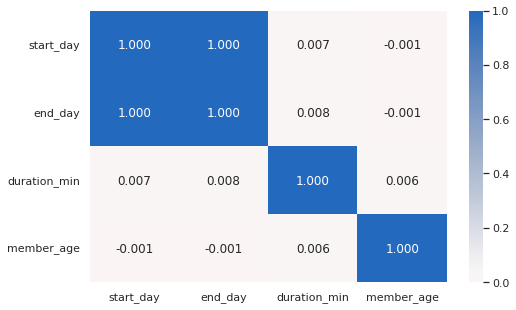

In [26]:
plt.figure(figsize = [8, 5])
sns.heatmap(df_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

df_copy.shape= (174952, 12)
dfcopy_samp.shape= (500, 12)


<Figure size 1152x360 with 0 Axes>

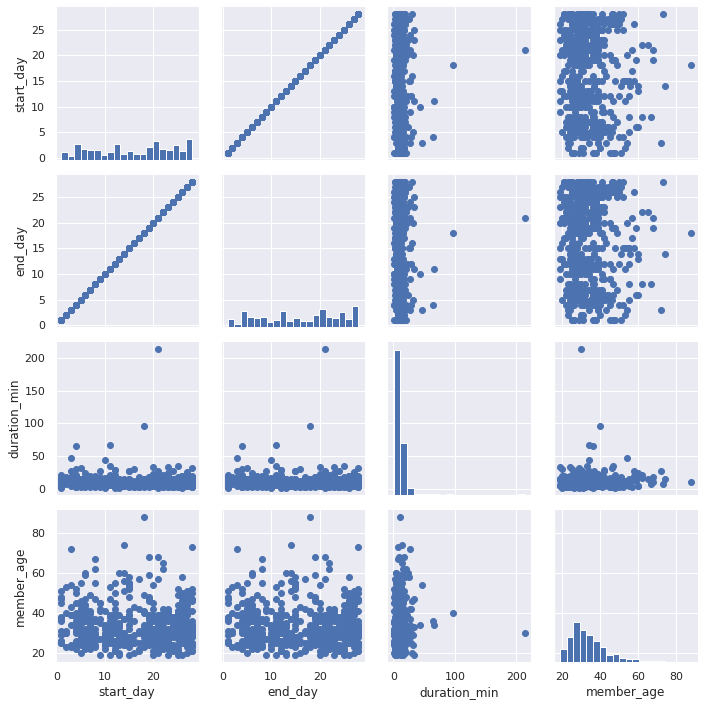

In [65]:
plt.figure(figsize = [16, 5]);
print("df_copy.shape=",df_copy.shape)
dfcopy_samp = df_copy.sample(n=500, replace = False)
print("dfcopy_samp.shape=",dfcopy_samp.shape)

g = sns.PairGrid(data = dfcopy_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

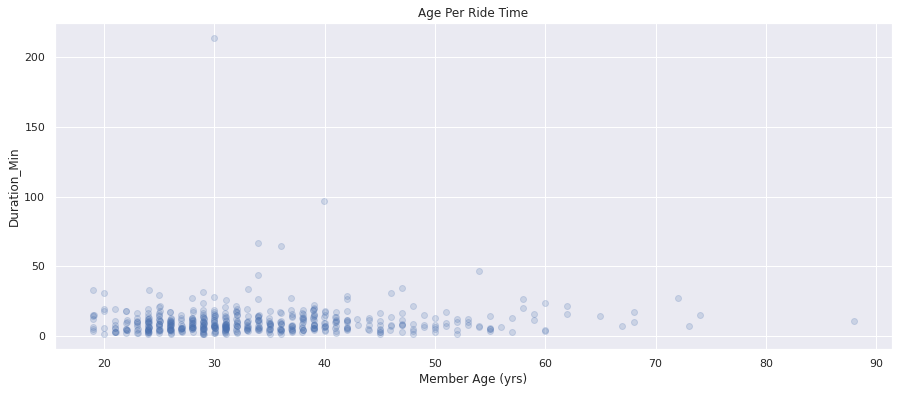

In [66]:
plt.figure(figsize=[15,6])

sns.regplot(data = dfcopy_samp, x = 'member_age', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha':1/5}, fit_reg=False)
label('Member Age (yrs)','Duration_Min','Age Per Ride Time');

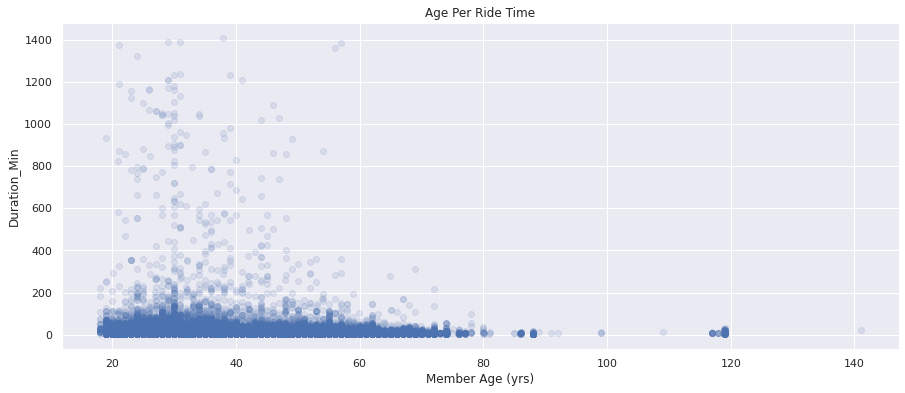

In [63]:
plt.figure(figsize=[15,6])

sns.regplot(data = df_copy, x = 'member_age', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha':1/8}, fit_reg=False)
label('Member Age (yrs)','Duration_Min','Age Per Ride Time');

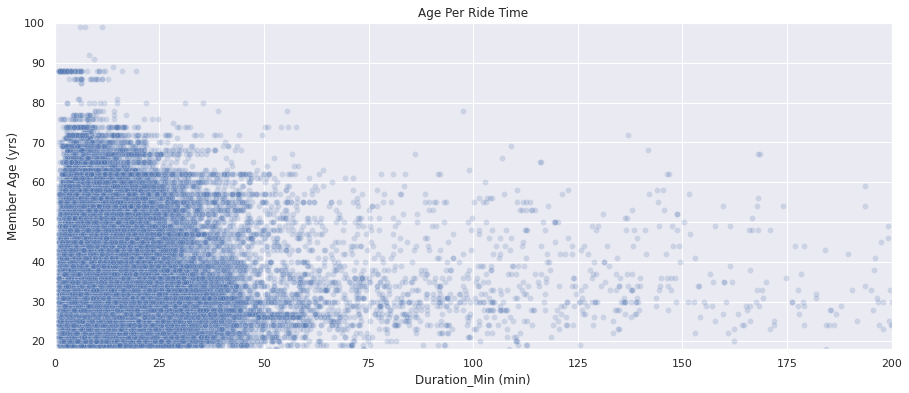

In [62]:
# zooming on age <=100 and duration <= 200 to give a more clearer picture

plt.figure(figsize=[15,6])


sns.scatterplot(data = df_copy, x =  df_copy['duration_min'] , y =  df_copy['member_age'] , alpha = 0.2 )
plt.ylim((18,100))
plt.xlim((0,200))
label('Duration_Min (min)','Member Age (yrs)','Age Per Ride Time');

##### The age group between 18 - 50 years have longest duration of bike rides with some rides extending up to 200 minutes, this might be due to more energy seen within this age group, between > 50 <= 60 years have most of their rides around <= 125 minutes,  > 60 <=  70years have most of hteir rides falling < 75 minutes while > 70 years have their rides around <= 40 minutes . meaning youths and middle age riders rode longer than other age groups

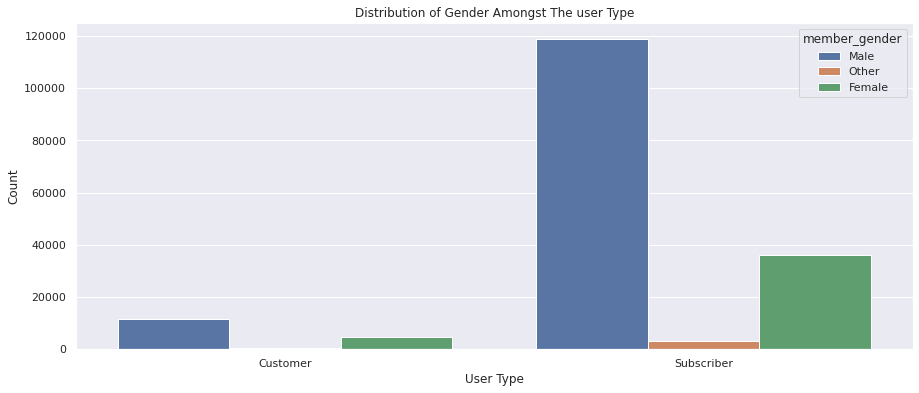

In [74]:
plt.figure(figsize=[15,6])

sns.countplot(data = df_copy, x = 'user_type', hue = 'member_gender')
label('User Type','Count', 'Distribution of Gender Amongst The user Type');

###### From the graph above, 'other' have the lowest count for each type of users. Even thou about 95% of member gender is male, it shows that the largest proportion of the male population fall under the Subscriber type.
##### There are more Female Subcribers than Female Customers
##### There are more Male Subcribers  than Male Customers

In [28]:
df_fgender = df_copy.query("member_gender == 'Female'")
df_mgender = df_copy.query("member_gender == 'Male'")

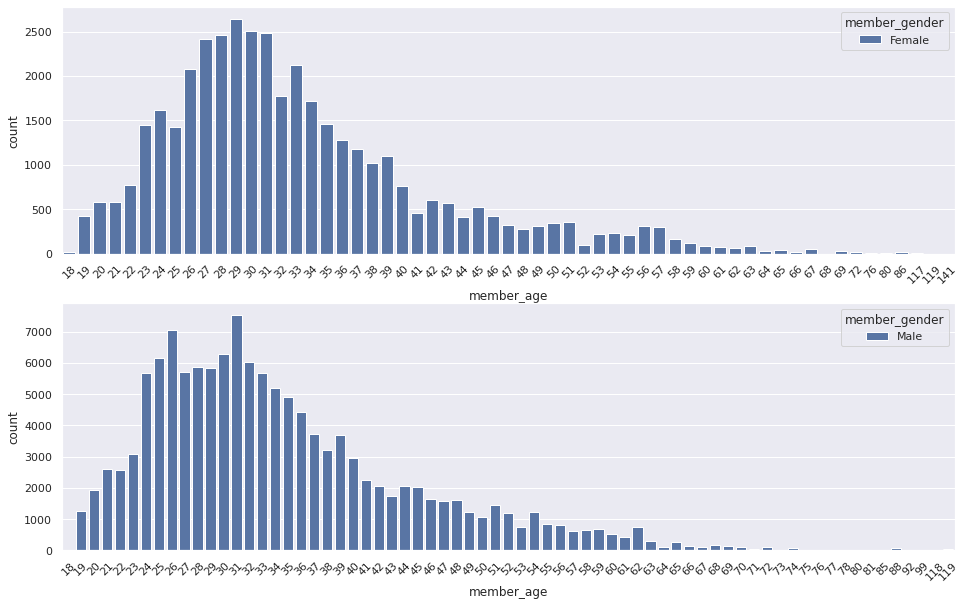

In [29]:
plt.figure(figsize = [16, 10])

plt.subplot(2,1, 1)
sns.countplot(data = df_fgender, x = 'member_age', hue = 'member_gender')
plt.xticks(rotation=45);

ax = plt.subplot(2,1, 2)
sns.countplot(data = df_mgender, x = 'member_age', hue = 'member_gender')
plt.xticks(rotation=45);

##### There is a uni-modal peak for the female curve with most female riders in their late twenties and early thirties. The male curve showing a bi-modal peak, most male riders fall within their early twenties and early thirties 

In [25]:
# function for violin plot
def violin_plot(x,y):
    plt.figure(figsize=[15,6])
    base_color = sns.color_palette()[0]

    sns.violinplot(data=df_copy, x=x, y=y, color=base_color, inner='quartile')
    plt.xticks(rotation=0);

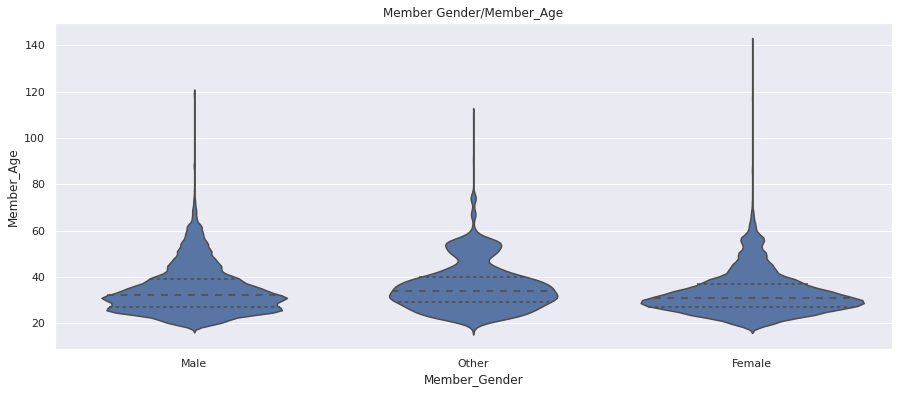

In [32]:
violin_plot('member_gender','member_age')
label('Member_Gender','Member_Age', 'Member Gender/Member_Age')

##### This further buttress the findings in the countplot

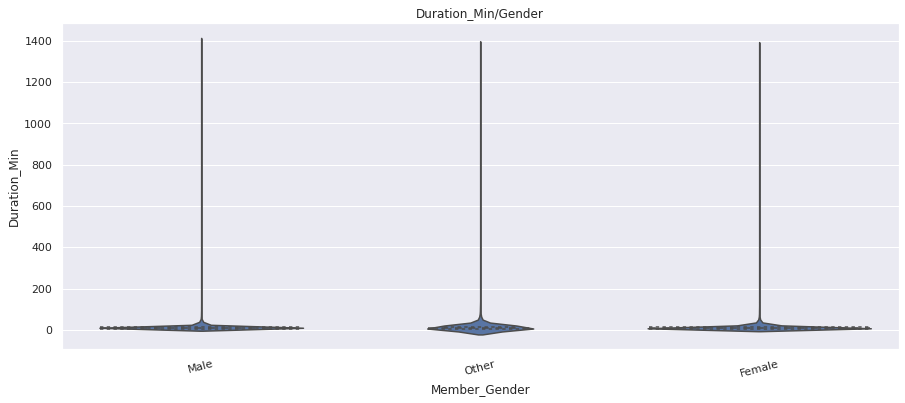

In [52]:
violin_plot('member_gender','duration_min')
label('Member_Gender','Duration_Min', 'Duration_Min/Gender')

#### The graph above shows a narrow violin shape with outliers in all gender type

##### I zoomed in , with the duration_min <= 100 minutes, this is to allow the dataset load faster and with the knowledge that >= 100 minutes consist of outlliers

##### So for future plots involving duration, I would be using df_100

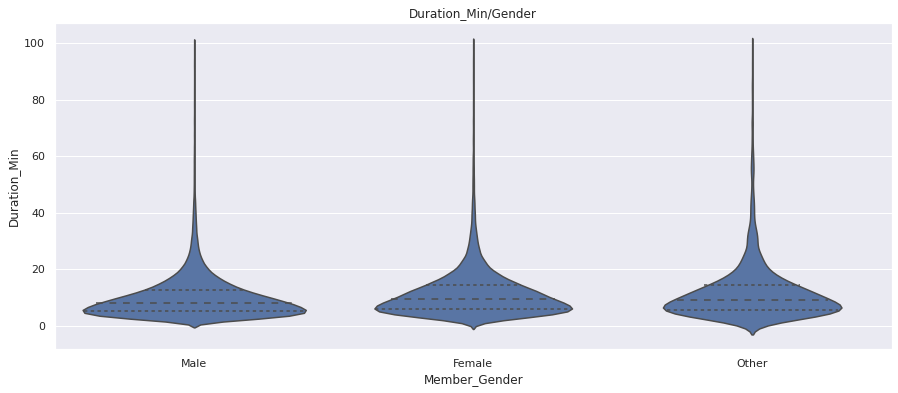

In [42]:
df_100 = df_copy.query("duration_min <= 100")

plt.figure(figsize=[15,6])
base_color = sns.color_palette()[0]

sns.violinplot(data=df_100, x='member_gender', y='duration_min', color=base_color, inner='quartile')
label('Member_Gender','Duration_Min', 'Duration_Min/Gender')
plt.xticks(rotation=0);

##### Both male and female show similar distribution , with a uni_modal distribution in all gender types, with their peaks roughly around 7-8 minutes. That is for all gender type , The most frequent duration of rides were around 7-8 minutes

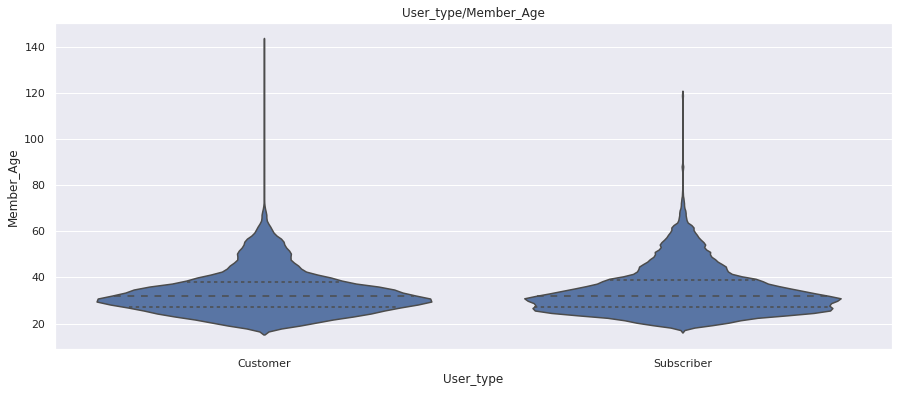

In [44]:
violin_plot('user_type','member_age')
label('User_type','Member_Age', 'User_type/Member_Age')

In [37]:
df_c_user = df_copy.query("user_type == 'Customer'")
df_s_user = df_copy.query("user_type == 'Subscriber'")

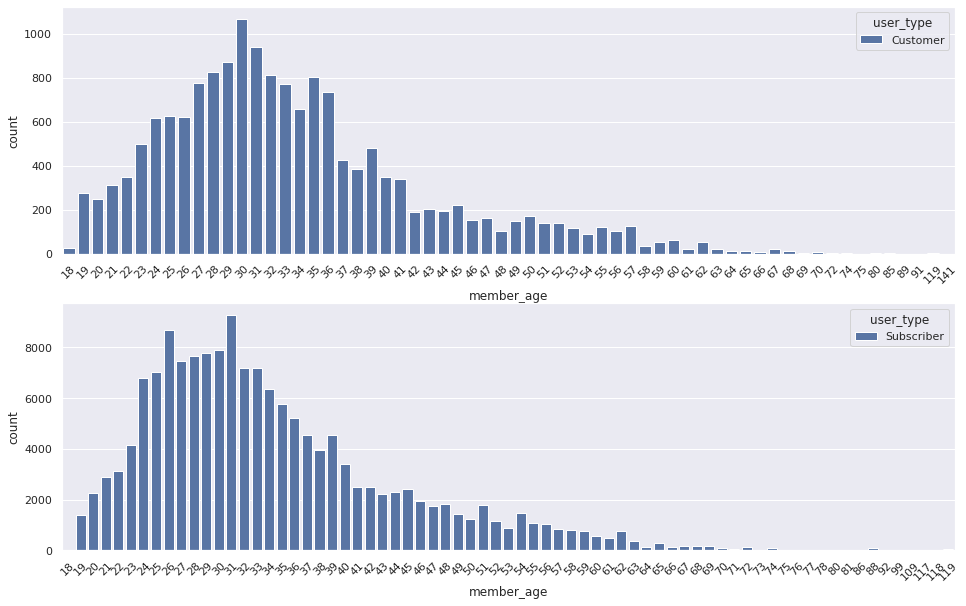

In [41]:
plt.figure(figsize = [16, 10])

plt.subplot(2,1, 1)
sns.countplot(data = df_c_user, x = 'member_age', hue = 'user_type');
plt.xticks(rotation=45);

ax = plt.subplot(2,1, 2)
sns.countplot(data = df_s_user, x = 'member_age', hue = 'user_type');
plt.xticks(rotation=45);

##### Most Customer's age is around 30 years while for Subcribers, the most frequent age group is around 25 and 31 years

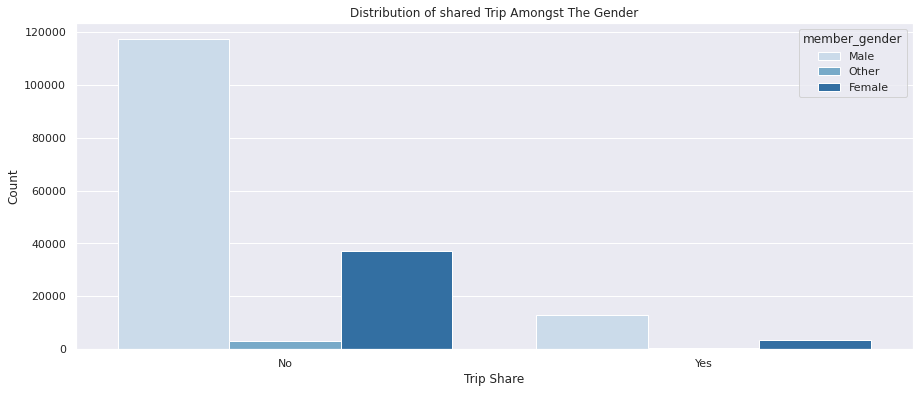

In [70]:
plt.figure(figsize=[15,6])

sns.countplot(data = df_copy, x = 'bike_share_for_all_trip', hue = 'member_gender', palette = 'Blues')
label('Trip Share','Count', 'Distribution of shared Trip Amongst The Gender');

##### More Males did not share their trip info as compared to the other gender type

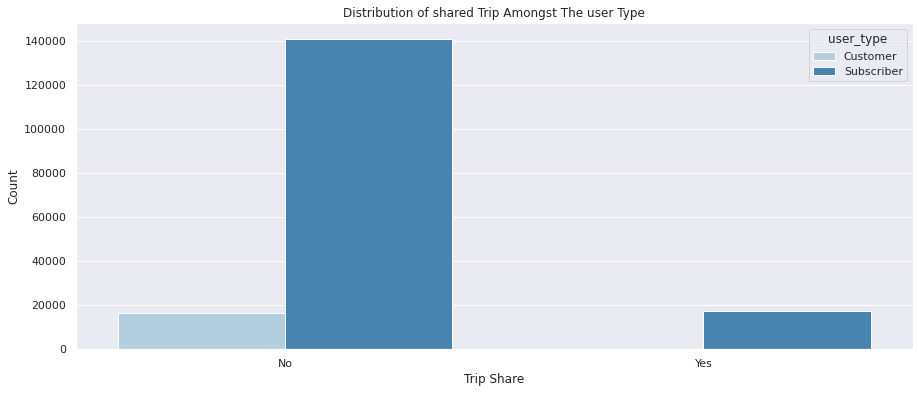

In [72]:
plt.figure(figsize=[15,6])

sns.countplot(data = df_copy, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Blues')
label('Trip Share','Count', 'Distribution of shared Trip Amongst The user Type');

##### The largest percentage of users who did not share their trip info are the Subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are no relation between member_age, duration_min with other feaures and also no relationship between features of interest. The only relationship (positive) seen is with themselves

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are no observable relationship between features of non-interest, but was surprised that the largest proportion of gender that did not share their trip were the males

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

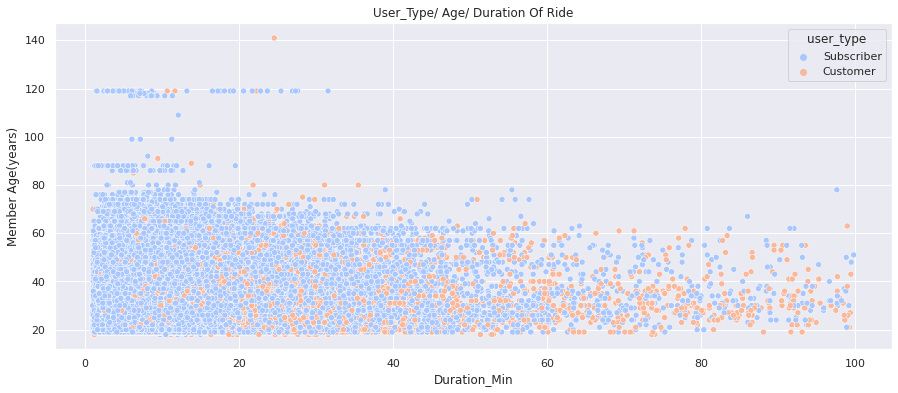

In [47]:
plt.figure(figsize=[15,6])
sns.scatterplot(data = df_100, x = df_100['duration_min'], y =df_100['member_age'], hue ='user_type',palette = "coolwarm")
label('Duration_Min', 'Member Age(years)', 'User_Type/ Age/ Duration Of Ride')

##### From the graph above, more of the subscribers fall within the age group of 20-80 years and have most of their ride duration between 0 - 40 minutes. The Customers have similar distribution as the Subscribers

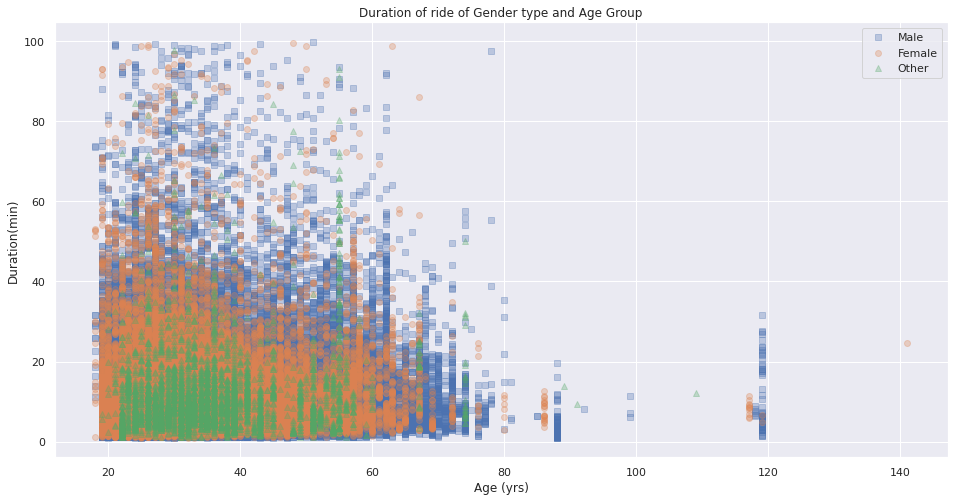

In [60]:
gender_markers = [['Male', 's'],['Female', 'o'],['Other', '^']]
plt.figure(figsize=[16,8])

for gender, marker in gender_markers:
    df_gender = df_100[df_100['member_gender'] == gender]
    plt.scatter((df_gender['member_age']), df_gender['duration_min'], marker = marker, alpha=0.3)
plt.legend(['Male','Female','Other'])
label('Age (yrs)','Duration(min)', 'Duration of ride of Gender type and Age Group')

##### There seems to be similar lenghts of bike rides for both male and female between 18 - 40 yrs, even thou the female population were less represented betwee the age of 40 - 60 years as compared to the males, they showed similar duration of time spent on bike rides.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was observed that Subscribers had more of longer ride duration, which could be infered from the fact that the largest proportion of Subcribers are Male who also had more of the longest duration of rides

### Were there any interesting or surprising interactions between features?

> I was surprised that the largest percentage of the gender that did not shaare their ride info, were the males.I would have loved to explore it further, if probably the reason could be the time of day the ride occured 

## Conclusions
> Various age groups were represented except for below 18 years, which might be due to consent issue.
> Data of Males were more than that of the female which could be either there were more male riders, which might be due to various reasons such as increased responsibilty on the part of a female as a daughter, wife or mother.
